In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [2]:
df = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/11_GLM2_ANCOVA/Data_Files/ViagraCovariate.dat', sep='\t')
df.head()

,dose,libido,partnerLibido
0,1,3,4
1,1,2,1
2,1,5,5
3,1,2,1
4,1,2,2


In [6]:
df.groupby(['dose']).describe()['libido']

,count,mean,std,min,25%,50%,75%,max
dose,,,,,,,,
1,9.0,3.222222,1.787301,2.0,2.0,2.0,4.0,7.0
2,8.0,4.875000,1.457738,3.0,4.0,4.5,5.5,7.0
3,13.0,4.846154,2.115268,2.0,4.0,4.0,6.0,9.0


In [7]:
df.groupby(['dose']).describe()['partnerLibido']

,count,mean,std,min,25%,50%,75%,max
dose,,,,,,,,
1,9.0,3.444444,2.068279,1.0,2.0,4.0,5.00,7.0
2,8.0,3.125000,1.726888,1.0,2.0,2.5,4.25,6.0
3,13.0,2.000000,1.632993,0.0,1.0,2.0,3.00,5.0


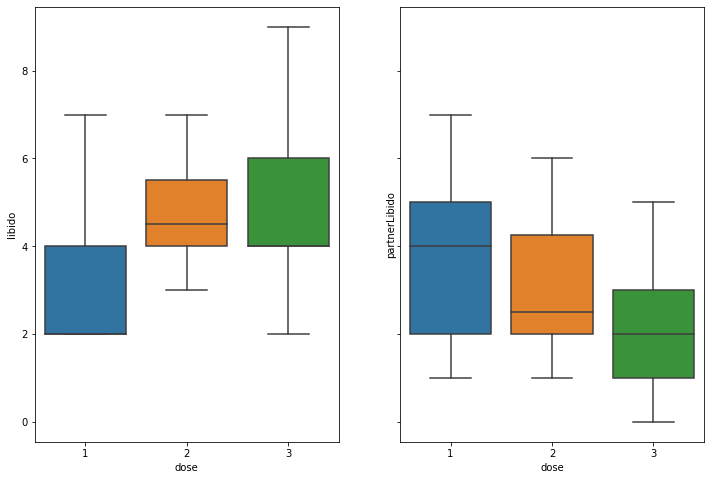

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(12,8))
_ = sns.boxplot(x='dose', y='libido', data=df, ax=ax1)
_ = sns.boxplot(x='dose', y='partnerLibido', data=df, ax=ax2)

In [11]:
df_dose1 = df[df['dose']==1]
df_dose2 = df[df['dose']==2]
df_dose3 = df[df['dose']==3]

In [13]:
# Levene's Test for Homogeneity of Variance (center = median)
st.levene(df_dose1['libido'], df_dose2['libido'], df_dose3['libido'])

LeveneResult(statistic=0.3255636973602896, pvalue=0.7249155808037104)

#### # levene test shows that homogeneity of variance is followed, let's do a good double check using Hartley's Fmax test

In [14]:
F_max = 2.115268**2/1.457738**2
F_max

2.1055804943265355

#### # from hartley's fmax table our fmax is less than the critical value of 5.34 (dof=9, k=3), so our variance is homogeneous.

In [15]:
# Checking assumption, independence of covariate and experimental manipulator
m00 = smf.ols('partnerLibido~C(dose)', data=df).fit()
anova_table = sm.stats.anova_lm(m00)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,12.769444,6.384722,1.979254,0.157718
Residual,27.0,87.097222,3.225823,NaN,NaN


#### # The main effect of dose is not significant, F(2, 27) = 1.98, p = .16, which shows that the average level of partner’s libido was roughly the same in the three Viagra groups. In other words, the means for partner’s libido are not significantly different in the placebo, low and high-dose groups. This result means that it is appropriate to use partner’s libido as a covariate in the analysis

In [16]:
m01 = smf.ols('libido~partnerLibido+C(dose)', data=df).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.500
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0295
Time:                        11:19:34   Log-Likelihood:                -57.101
No. Observations:                  30   AIC:                             122.2
Df Residuals:                      26   BIC:                             127.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7892      0.867      2.063      0.049       0.007       3.572
C(dose)[T.2]      1.7857      0.849      2.102      0.045       0.040       3.532
C(dose)[T.3]      2.2249      0.803      2.771      0.010       0.575       3.875
partnerLibido     0.4160      0.187      2.227      0.035       0.032       0.800
==============================================================================
Omnibus:                        5.853   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.111
Skew:                           0.743   Prob(JB):                        0.128
Kurtosis:                       4.040   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
anova_table1 = sm.stats.anova_lm(m01, typ=3)   # defaults to type 2
anova_table1

,sum_sq,df,F,PR(>F)
Intercept,12.943064,1.0,4.257204,0.049202
C(dose),25.185194,2.0,4.141929,0.027447
partnerLibido,15.075748,1.0,4.958681,0.034833
Residual,79.047116,26.0,NaN,NaN


## Planned Contrasts

In [24]:
contrast1 = [-2, 1, 1]
contrast2 = [0,-1, 1]
contrast = np.vstack((contrast1, contrast2))
contrast = contrast.T
contrast

array([[-2,  0],
       [ 1, -1],
       [ 1,  1]])

In [27]:
contrast_model = smf.ols("libido ~ partnerLibido+C(dose, contrast)", data=df).fit()
print(contrast_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.500
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0295
Time:                        14:57:44   Log-Likelihood:                -57.101
No. Observations:                  30   AIC:                             122.2
Df Residuals:                      26   BIC:                             127.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### the concept of adjusted means

#### # We now turn our attention to the treatment means , adjusted to remove the effect of the covariate.

#### # https://www.real-statistics.com/analysis-of-covariance-ancova/regression-approach-ancova/

#### # y = 1.7892 + 0.4160 partnerLibido + 1.7857 t2 + 2.2249 t3

In [32]:
# from m01 summary table

y_placebo = 1.7892 + 0.4160* df['partnerLibido'].mean() + 0 + 0
y_low = 1.7892 + 0.4160* df['partnerLibido'].mean() + 1* 1.7857 + 0
y_high = 1.7892 + 0.4160* df['partnerLibido'].mean() + 0* 1.7857 + 1* 2.2249
print(f"adjusted means for following groups: \n\n1.Placebo={y_placebo}\n\n2.Low Dose={y_low}\n\n3.High Dose={y_high}")

adjusted means for following groups: 

1.Placebo=2.926266666666667

2.Low Dose=4.711966666666667

3.High Dose=5.151166666666667


#### # from the above output , we can see if the effect of covariate is removed ,the difference between low and high dose group's mean increases considerably.

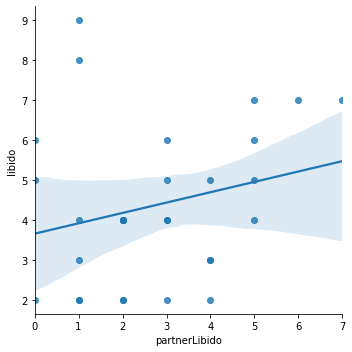

In [33]:
# Interpreting the covariate
_ = sns.lmplot(y='libido', x="partnerLibido", data=df)

#### # Figure shows the resulting scatterplot for these data and confirms what we already know: the effect of the covariate is that as partner’s libido increases, so does the participant’s libido (as shown by the slope of the regression line).

### Post Hoc tests in ANCOVA

### I was not able to find appropriate python package to do Post-Hoc test on adjusted means in python, So refer to R's function ***glht()*** or find the same in R's section of this repo . 

## Plots in Ancova

In [35]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()
prediction.head()

,predicted,standarized_prediction
0,3.453357,-0.870540
1,2.205230,-2.060217
2,3.869399,-0.473981
3,2.205230,-2.060217
4,2.621273,-1.663658


In [36]:
import statsmodels.stats.outliers_influence as sms

In [37]:
summary_frame = sms.OLSInfluence(m01).summary_frame()
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

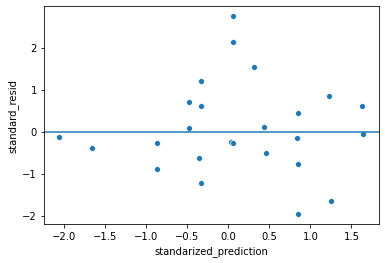

In [38]:
_ = sns.scatterplot(y = 'standard_resid', x='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

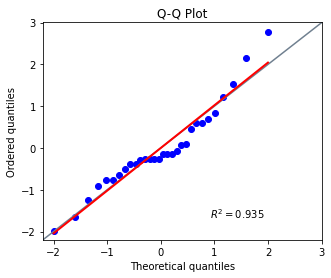

In [39]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

#### # The first graph (on the left of the figure) can be used for testing homogeneity of variance. The plot we have does show funnelling (the spread of scores is wider at some points than at others), which implies that the residuals might be heteroscedastic (a bad thing). The second plot (at bottom) is a Q-Q plot , which tells us about the normality of residuals in the model. We want our residuals to be normally distributed, which means that the dots on the graph should hover around the diagonal line. On ours, it looks like deviated from diagonal line. Again, this is not good news for the model. These plots suggest that a robust version of ANCOVA should be done.

## Final Remarks

In [42]:
model_justAnova = smf.ols('libido~C(dose)', data=df).fit()
# model_justAnova.summary()
anovaTable = sm.stats.anova_lm(model_justAnova)
anovaTable

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,16.843803,8.421902,2.415899,0.108339
Residual,27.0,94.122863,3.486032,NaN,NaN


#### # It shows non-significant difference .So , if we hadn't taken covariate in our calculation , the resulting summary would be incorrect and misleading

### Checking assumption of homegeniety of regression slopes

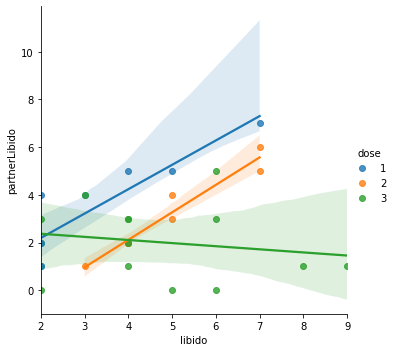

In [48]:
_ = sns.lmplot(x='libido', y='partnerLibido', hue='dose', data=df)       # groupwise effect

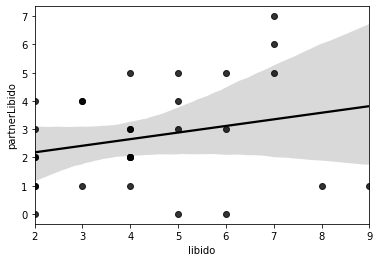

In [49]:
_ = sns.regplot(x='libido', y='partnerLibido', data=df, color='black')   # overall effect

In [47]:
hoRS_model= smf.ols('libido~C(dose)*partnerLibido', data=df).fit()
anova_hoRS = sm.stats.anova_lm(hoRS_model, typ=2)
anova_hoRS

,sum_sq,df,F,PR(>F)
C(dose),25.185194,2.0,5.155572,0.013719
partnerLibido,15.075748,1.0,6.172206,0.020348
C(dose):partnerLibido,20.426594,2.0,4.181456,0.027667
Residual,58.620522,24.0,NaN,NaN


#### # shows the main summary table for the ANCOVA including the interaction term. The effects of the dose of Viagra and the partner’s libido are still significant, but the main thing in which we’re interested is the interaction term, so look at the significance value of the covariate by outcome interaction (partnerLibido:dose), if this effect is significant then the assumption of homogeneity of regression slopes has been broken. The effect here is significant (p < .05); therefore the assumption is not tenable. Although this finding is not surprising given the pattern of relationships in above plots, it does raise concern about the main analysis. This example illustrates why it is important to test assumptions and not to just blindly accept the results of an analysis.

#### # Note: We could also use Type III sums of squares here: because we’re interested only in the highest-order interaction, Type II and III sums of squares will give us exactly the same results

##  Effect size

In [50]:
print(anova_table1)

                  sum_sq    df         F    PR(>F)
Intercept      12.943064   1.0  4.257204  0.049202
C(dose)        25.185194   2.0  4.141929  0.027447
partnerLibido  15.075748   1.0  4.958681  0.034833
Residual       79.047116  26.0       NaN       NaN


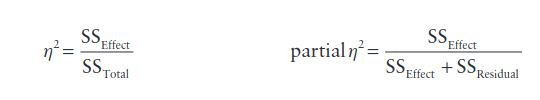

In [54]:
from IPython.display import Image
Image('/home/atrides/Downloads/n2.png')

In [56]:
partial_η2_dose = 25.185194/(25.185194+79.047116)
partial_η2_dose

0.24162559574857354

In [57]:
partial_η2_partnerLibido = 15.075748/(15.075748+79.047116)
partial_η2_partnerLibido

0.16017094422456163

In [65]:
# R contrast
def r_contrast(t,d0f):
    return np.sqrt(t**2/(t**2+d0f))
d0f=26 # N-p-1 = 30-(2+1)-1

In [70]:
print(contrast_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.500
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0295
Time:                        17:03:43   Log-Likelihood:                -57.101
No. Observations:                  30   AIC:                             122.2
Df Residuals:                      26   BIC:                             127.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [66]:
r_contrast(2.227,d0f)

0.40024235436415706

In [67]:
r_contrast(2.785,d0f)

0.4793450677347502

In [68]:
r_contrast(0.541,d0f)

0.10550664883954561

#### # If you think back to our benchmarks for effect sizes, the effect of the covariate (.400) and the difference between the combined dose groups and the placebo (.479) both represent medium to large effect sizes (they’re both between .4 and .5). Therefore, as well as being statistically significant, these effects are substantive findings. The difference between the high- and low-dose groups (.106) was a fairly small effect.

### An alternative of getting effect size of contrasts,is to get all pairwise effect sizes

In [71]:
def s_within(s1,s2,n1,n2):
    return np.sqrt((((n1-1)*(s1**2))+((n2-1)*(s2**2)))/(n1+n2-2))

def mes(m1, m2, s1, s2, n1, n2):
    s_ = s_within(s1,s2,n1,n2)
    d = (m1-m2)/s_   # cohen's D
    d_var = (n1+n2)/(n1*n2) + (d**2)/(2*(n1+n2))    # variance of d 
    
    df = n1+n2-2
    J = 1-3/(4*df-1)   # correction factor
    
    g = J*d          #   Hedges' g
    
    g_var = (J**2)*d_var     #   variance of g
    
    a = (n1+n2)**2/(n1*n2)    # a corrects for inbalance in n1 & n2
    
    r = d/np.sqrt(d**2+a)  # correlation coeffecient
    
    r_var = (a**2 * d_var)/((d**2 + a)**3)     #   variance of r
    
    
    print(f'Cohen\'s d: {d}, var.d: {d_var}')
    print(f'Hedge\'s g: {g}, var.g: {g_var}')
    print(f'Correlation coeffecient: {r}, var.r: {r_var}')

#### # We know the adjusted means and sample sizes, the problem is that we don’t know the adjusted standard deviations. We could either use the unadjusted standard deviations as an approximation, or we could estimate them from the standard errors of the adjusted means

In [72]:
# placebo-low
mes(2.92, 4.71, 1.79, 1.46, 9,8)

Cohen's d: -1.0886337947101665, var.d: 0.2709676857871422
Hedge's g: -1.033279533962192, var.g: 0.24411222712682507
Correlation coeffecient: -0.4774428394493218, var.r: 0.031066020760067054


In [73]:
# high-low
mes(5.15, 4.71, 2.11, 1.46, 13,8)

Cohen's d: 0.23199127672690636, var.d: 0.20320450436301454
Hedge's g: 0.2227116256578301, var.g: 0.1872732712209542
Correlation coeffecient: 0.1119515962214018, var.r: 0.04614191790941418


In [74]:
# high-placebo
mes(5.15, 2.92, 2.11, 1.79, 13,9)

Cohen's d: 1.1216231105793681, var.d: 0.2166259699020457
Hedge's g: 1.079029827899139, var.g: 0.20048575583307418
Correlation coeffecient: 0.4829027244028852, var.r: 0.02361053121522755


#### # The difference between the low-dose and placebo group is a large effect (the adjusted means are about a standard deviation different), d= -1.08, r=-.47; the difference between the high-dose and placebo groups is also a large effect (over a standard deviation difference between the adjusted group means), d= 1.12, r= .48; finally,he difference between the high- and low-dose groups is a very small effect (the adjusted means are about a tenth of standard deviation different), d= 0.23, r= .11

## Final Reporting

#### # The covariate, partner’s libido, was significantly related to the participant’s libido, F(1, 26) = 4.96, p < .05, r= .40. There was also a significant effect of the dose of Viagra on levels of libido after controlling for the effect of partner’s libido, F(2, 26) = 4.14, p < .05, partial η2= .24

#### # Planned contrasts revealed that taking a high or low dose of Viagra significantly increased libido compared to taking a placebo, t(26) = 2.79, p < .01, r= .48; there was no significant difference between the high and low doses of Viagra, t(26) = 0.54, p = .59, r= .11

#### # ukey post hoc tests revealed that the covariate adjusted mean of the high-dose group was significantly greater than that of the placebo (difference = 2.22, t= 2.77, p< .05, d= 1.13). However, there was no significant difference between the low-dose and pla-cebo groups (difference = 1.79, t= 2.10, p= .11, d= 1.04) and between the low-dose and high-dose groups (difference = 0.44, t= 0.54, p= .85, d= 0.11). Despite the lack of significance between the low-dose and placebo groups, the effect size was quite large